# Интегрирование

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from src.logic.functions import OneArgFunction

Используется метод трапеций 

![Метод трапеций](https://wikimedia.org/api/rest_v1/media/math/render/svg/b775acb091ee2e332a0d633040a06d9814b5d3bd)

Формула для всего отрезка

![Формула для всего отрезка](https://wikimedia.org/api/rest_v1/media/math/render/svg/1c7314766a21537e0c72d244ee6fc77a28decd05)

Погрешность метода

![Погрешность метода](https://wikimedia.org/api/rest_v1/media/math/render/svg/d72ebce436216c6c9aeb34c1cc39f772184c1336)

# Гладкая

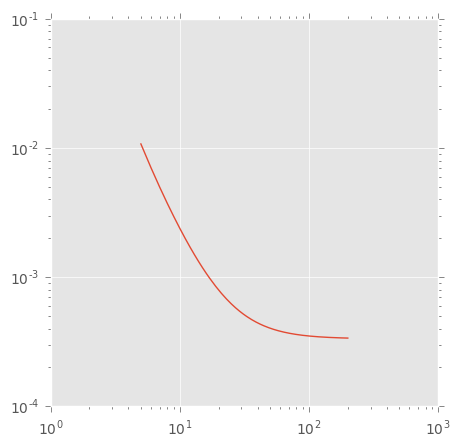

In [5]:
point_counts = []
integral_values = []
for points_count in range(5, 201):
    func = OneArgFunction(str_func='x^2', arg='x', begin=0, end=1, points_count=points_count)
    point_counts.append(points_count)
    integral_values.append(abs(0.333 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [6]:
func = OneArgFunction(str_func='x^2', arg='x', begin=0, end=1, points_count=points_count)
abs(0.333 - func.integrate())

0.000337541981263068

# Прерывная

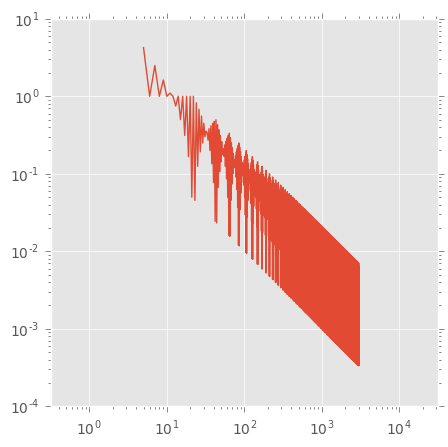

In [7]:
point_counts = []
integral_values = []
for points_count in range(5, 3001):
    arg_vals = [(x, 1) if x > 0 else (x, -1) for x in np.linspace(-10, 11, points_count)]
    func = OneArgFunction(arg_vals=arg_vals)
    point_counts.append(points_count)
    integral_values.append(abs(1 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [8]:
arg_vals = [(x, 1) if x > 0 else (x, -1) for x in np.linspace(-10, 11, points_count)]
func = OneArgFunction(arg_vals=arg_vals)
abs(1 - func.integrate())

0.0056685561853946353

# Осцелирующая

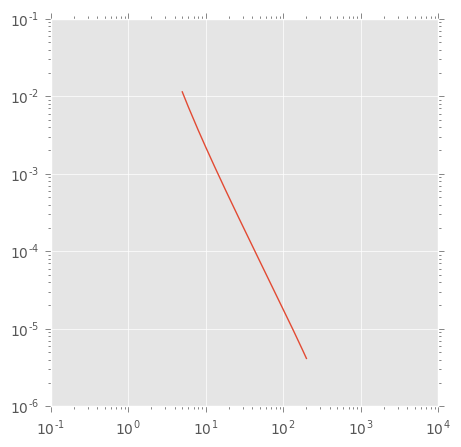

In [9]:
point_counts = []
integral_values = []
for points_count in range(5, 201):
    func = OneArgFunction(str_func='2sin(x^2)', arg='x', begin=0, end=1, points_count=points_count)
    point_counts.append(points_count)
    integral_values.append(abs(0.620537 - func.integrate()))

plt.figure(figsize=(5, 5))
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.plot(point_counts, integral_values)

In [10]:
func = OneArgFunction(str_func='2sin(x^2)', arg='x', begin=0, end=1, points_count=points_count)
abs(0.620537 - func.integrate())

4.15135666653743e-6

---

# Интерполирование

## Гладкая функция

In [5]:
func_20 = OneArgFunction(str_func='x^2', arg='x', begin=0, end=10, points_count=200)

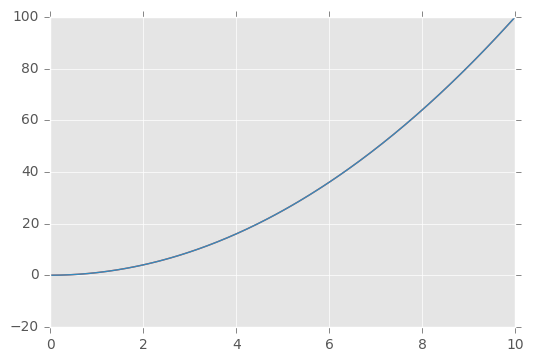

In [7]:
x_orig, y_orig = map(np.array, zip(*func_20.tabulation.items()))
plt.plot(x_orig, y_orig)

x_int, y_int = map(np.array, zip(*func_20.interpolate(2000).items()))

plt.plot(x_int, y_int)
plt.show();

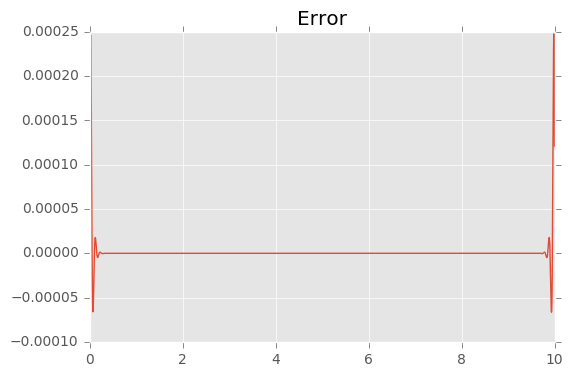

In [20]:
diff = [func_20.interpolate_point(x) - func_20._calculate(x) for x in x_int]
plt.title("Error")
plt.plot(x_int, diff)
plt.show();

## Прерывная функция

In [21]:
arg_vals = [(x, 1.0) if x > 0 else (x, -1.0) for x in np.linspace(-10, 10, 200)]
func = OneArgFunction(arg_vals=arg_vals)

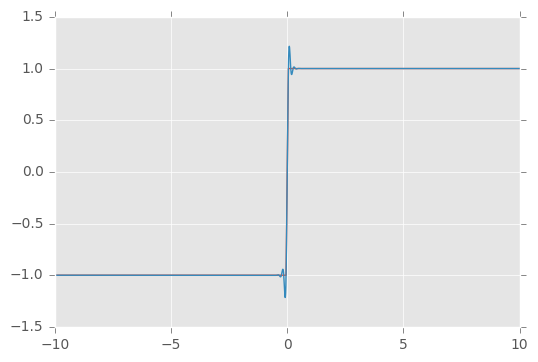

In [22]:
x_orig, y_orig = map(np.array, zip(*func.tabulation.items()))
y_orig[x_orig == 0] = np.nan

plt.plot(x_orig, y_orig)

x_int, y_int = zip(*func.interpolate(2000).items())
plt.plot(x_int, y_int)
plt.show();

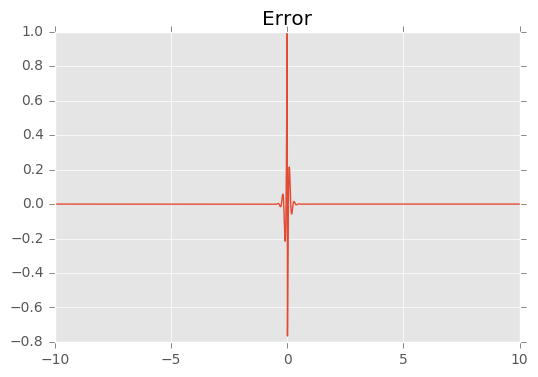

In [23]:
diff = [func.interpolate_point(x) + 1 if x < 0 else func.interpolate_point(x) - 1 for x in x_int]
plt.title("Error")
plt.plot(x_int, diff)
plt.show();

## Осцилирующая функция

In [14]:
func_20 = OneArgFunction(str_func='2sin(x**2)', arg='x', begin=0, end=10, points_count=200)

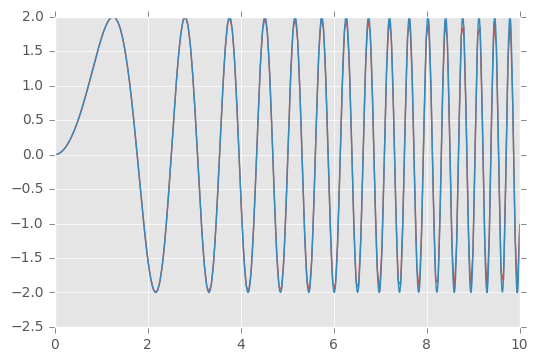

In [16]:
x_orig, y_orig = map(np.array, zip(*func_20.tabulation.items()))
plt.plot(x_orig, y_orig)

x_int, y_int = map(np.array, zip(*func_20.interpolate(2000).items()))

plt.plot(x_int, y_int)
plt.show();

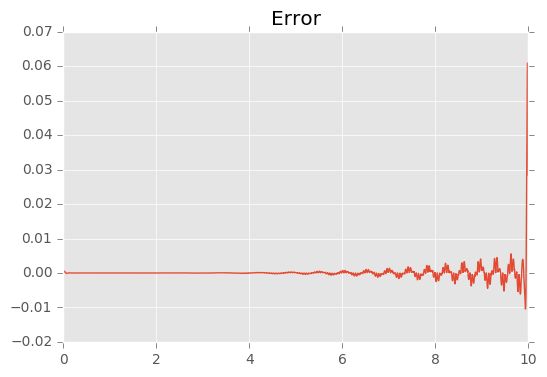

In [13]:
diff = [func_20.interpolate_point(x) - func_20._calculate(x) for x in x_int]
plt.title("Error")
plt.plot(x_int, diff)
plt.show();

# Рунге-Кутт

Решим систему
$$
\begin{cases}
\dot{x}=-y\\
\dot{y}=x\\
x_0=1,
y_0=0
\end{cases}
$$

Аналитическое решение:
$$
x(t)=cos(x)\\
y(t)=sin(x)\\
$$

In [5]:
from src.logic.runge_kutta_solver import RungeKuttaSolver

In [8]:
x_f = '-y'
y_f = 'x'
x0 = 1
y0 = 0
T = 10
args = np.linspace(0, T, 500)

solver = RungeKuttaSolver(x_f, y_f, x0, y0, args)
x, y = solver.solve()

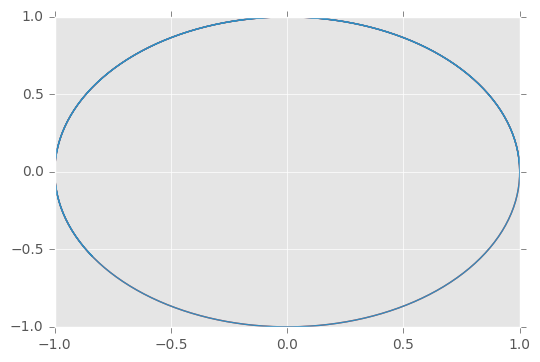

In [22]:
plt.plot(list(x.tabulation.values()), list(y.tabulation.values()))
plt.plot(np.cos(args), np.sin(args))

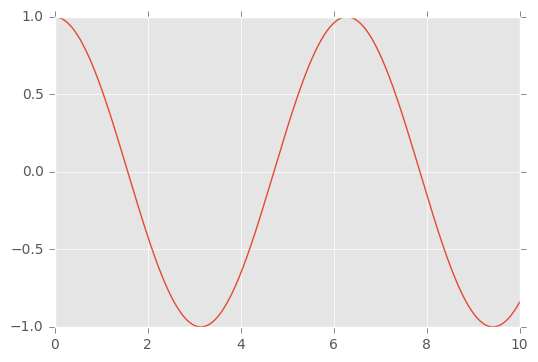

In [24]:
plt.plot(list(x.tabulation.keys()), list(x.tabulation.values()))
plt.plot(args, np.cos(args))

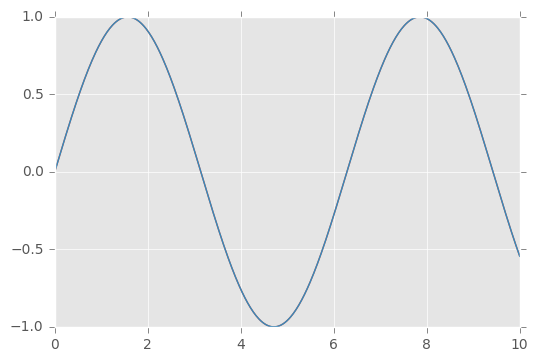

In [25]:
plt.plot(list(y.tabulation.keys()), list(y.tabulation.values()))
plt.plot(args, np.sin(args))

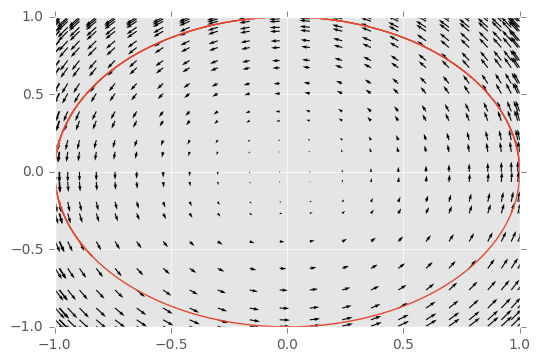

In [61]:
step = 20
X, Y = np.meshgrid(np.array(list(x.tabulation.values())[::20], dtype=float), np.array(list(y.tabulation.values())[::20], dtype=float))
U = -Y
V = X
plt.quiver(X, Y, U, V)
plt.plot(np.array(list(x.tabulation.values())), np.array(list(y.tabulation.values())))

## Ошибка

In [ ]:
x_err = []
y_err = []
grid = np.arange(10, 1000, 100)
for n in grid:
    args = np.linspace(0, T, n)
    x, y = solver = RungeKuttaSolver(x_f, y_f, x0, y0, args).solve()
    x_err.append(np.max(np.abs(np.array(list(x.tabulation.values()), dtype=float) - np.cos(args))))
    y_err.append(np.max(np.abs(np.array(list(y.tabulation.values()), dtype=float)  - np.sin(args))))

In [ ]:
plt.plot(np.log(grid), np.log(x_err), label='$log(|| x - \hat{x} ||)$')
plt.plot(np.log(grid), np.log(y_err), label='$log(|| y - \hat{y} ||)$')
plt.xlabel('log N')
plt.legend()

Ошибка убывает экспоненциально